<a href="https://colab.research.google.com/github/Katas-23/TCS_EV_Project/blob/main/Dataset_Experiment_v1_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **This project was created by David Gyulgyulyan**
### **ID: 6_Gyulgyulyan**

# **Final Research Question:**

**How does electric vehicle availability differ between urban and rural counties, and what might this tell us about the difference between the area types?**

# **Import important stuff**

In [1]:
# This code needs to be run first before anything.
!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

# **Data Cleaning**

# 1. Import Dataset

In [ ]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD" # This is the direct link to the CSV data

ev_df = pd.read_csv(url)
display(ev_df.head())

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


# 2. Check for Null Values

In [ ]:
# Checking for null values.
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250659 non-null  object 
 1   County                                             250653 non-null  object 
 2   City                                               250653 non-null  object 
 3   State                                              250659 non-null  object 
 4   Postal Code                                        250653 non-null  float64
 5   Model Year                                         250659 non-null  int64  
 6   Make                                               250659 non-null  object 
 7   Model                                              250659 non-null  object 
 8   Electric Vehicle Type                              250659 non-null  object

In [ ]:
# Checking for null values.
ev_df[ev_df.isna().any(axis = 1)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
265,7JRBR0FM0N,NaN,NaN,BC,NaN,2022,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.0,0.0,NaN,205035967,NaN,NaN,NaN
296,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,NaN,159850029,NaN,NaN,NaN
321,5YJ3E1EB2M,NaN,NaN,NS,NaN,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,179569743,NaN,NaN,NaN
18669,ZHWUC1ZM5S,King,Seattle,WA,98125.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,46.0,282538896,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
26239,WP0AH2YA6S,Kitsap,Poulsbo,WA,98370.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,23.0,277679979,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250312,5YJ3E1EA1R,Olmsted,Rochester,MN,55903.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,272474205,POINT (-92.47868 44.03008),NON WASHINGTON STATE ELECTRIC UTILITY,2.710900e+10
250331,WVWPR7AUXK,Ventura,Moorpark,CA,93021.0,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125.0,0.0,NaN,259831708,POINT (-118.88221 34.28706),NON WASHINGTON STATE ELECTRIC UTILITY,6.111008e+09
250354,5YJ3E1EB1K,Barnstable,Brewster,MA,2631.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,NaN,117046933,POINT (-70.06624 41.75916),NON WASHINGTON STATE ELECTRIC UTILITY,2.500101e+10
250470,1G1FX6S06J,Montgomery,Conroe,TX,77304.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,NaN,110401007,POINT (-95.4946 30.33878),NON WASHINGTON STATE ELECTRIC UTILITY,4.833969e+10


# 3. Learning About the Dataset

In [ ]:
# This is not important, but useful.
print(ev_df['Make'].unique())
print(ev_df['Model'].unique())

['TESLA' 'KIA' 'FIAT' 'TOYOTA' 'CHEVROLET' 'AUDI' 'NISSAN' 'ACURA' 'BMW'
 'FORD' 'RIVIAN' 'MAZDA' 'CHRYSLER' 'VOLVO' 'PORSCHE' 'POLESTAR' 'JEEP'
 'MINI' 'MITSUBISHI' 'HYUNDAI' 'VOLKSWAGEN' 'FISKER' 'LEXUS' 'SMART'
 'HONDA' 'SUBARU' 'MERCEDES-BENZ' 'LAND ROVER' 'LUCID' 'CADILLAC'
 'GENESIS' 'GMC' 'LINCOLN' 'JAGUAR' 'ALFA ROMEO' 'VINFAST' 'DODGE' 'TH!NK'
 'LAMBORGHINI' 'BENTLEY' 'BRIGHTDROP' 'MULLEN AUTOMOTIVE INC.'
 'ROLLS-ROYCE' 'WHEEGO ELECTRIC CARS' 'AZURE DYNAMICS' 'RAM']
['MODEL S' 'EV6' 'MODEL Y' '500' 'NIRO' 'MODEL X' 'MODEL 3' 'PRIUS'
 'BOLT EV' 'VOLT' 'E-TRON' 'LEAF' 'ZDX' '330E' 'I3' 'C-MAX' 'R1T' 'CX-90'
 'PACIFICA' 'S60' 'PANAMERA' 'FUSION' 'SPORTAGE' 'XC60' 'XC90' 'SORENTO'
 'PS2' 'X5' 'GRAND CHEROKEE' 'Q5 E' 'F-150' 'XC40' 'COUNTRYMAN'
 'OUTLANDER' 'C40' 'BZ4X' 'WRANGLER' 'X3' 'HARDTOP' 'TUCSON' 'I5' 'E-GOLF'
 '745E' 'SOUL' 'FOCUS' 'ARIYA' 'A3' 'RAV4 PRIME (PHEV)' 'Q4'
 'MUSTANG MACH-E' 'SANTA FE' 'OCEAN' 'ESCAPE' 'R1S' 'PRIUS PRIME (PHEV)'
 'I8' 'OPTIMA' 'RX' 'FORTWO' 'IO

In [ ]:
# Analyzing different "Electric Vehicle Type"
print(ev_df['Electric Vehicle Type'].unique())

['Battery Electric Vehicle (BEV)' 'Plug-in Hybrid Electric Vehicle (PHEV)']


In [ ]:
# Check first and last rows to get a general idea.
ev_df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
250654,7SAYGDEE7S,Franklin,Pasco,WA,99301.0,2025,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,9.0,274986323,POINT (-119.09467 46.23542),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,5.302102e+10
250655,2C4RC1L77J,Pierce,Tacoma,WA,98407.0,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,27.0,128901748,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
250656,7SAYGDEF6P,Pierce,Bonney Lake,WA,98391.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,31.0,258537660,POINT (-122.17144 47.19175),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
250657,WBY8P6C54K,King,Seattle,WA,98117.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153.0,0.0,36.0,477080334,POINT (-122.38418 47.70044),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
250658,JTMAB3FV8P,Klickitat,Goldendale,WA,98620.0,2023,TOYOTA,RAV4 PRIME (PHEV),Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,14.0,255440223,POINT (-120.82545 45.823),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF K...,5.303995e+10


# 4. Cleaning Up the Dataset

In [ ]:
# Sum of city null values.
ev_df['City'].isna().sum()

np.int64(6)

In [ ]:
# Remove all non-Washington states (along with null values) by creating a new DataFrame.
wa_df = ev_df[ev_df['State'] == 'WA']

# 5. Cleaning Up Remaining Null Values

In [ ]:
# Checking again.
wa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250076 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250076 non-null  object 
 1   County                                             250076 non-null  object 
 2   City                                               250076 non-null  object 
 3   State                                              250076 non-null  object 
 4   Postal Code                                        250076 non-null  float64
 5   Model Year                                         250076 non-null  int64  
 6   Make                                               250076 non-null  object 
 7   Model                                              250076 non-null  object 
 8   Electric Vehicle Type                              250076 non-null  object 
 9 

In [ ]:
# Total null values.
print(wa_df[['Electric Range', 'Base MSRP', 'Vehicle Location']].isna().sum())

Electric Range      21
Base MSRP           21
Vehicle Location     8
dtype: int64


In [ ]:
wa_df[wa_df.isna().any(axis = 1)]
# After looking at the missing values, only luxury vehicles are missing values, so it is not random.
# Coordinates may be useless in this study, so they can be removed.

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
18669,ZHWUC1ZM5S,King,Seattle,WA,98125.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,46.0,282538896,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
26239,WP0AH2YA6S,Kitsap,Poulsbo,WA,98370.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,23.0,277679979,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10
47277,WP0AE2YA6S,King,Seattle,WA,98121.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,36.0,277367618,POINT (-122.34468 47.61578),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
54153,WP0AC2YA3S,King,Shoreline,WA,98177.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,32.0,274513284,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
56385,WP0AC2YA2S,King,Medina,WA,98039.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,48.0,274380816,POINT (-122.23892 47.61613),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
64323,ZHWUC1ZM3S,King,Mercer Island,WA,98040.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,41.0,279110842,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
83958,WP0AE2YA5S,Snohomish,Everett,WA,98203.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,38.0,275868400,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,5.306104e+10
93248,WP0AF2YA0S,Clark,Vancouver,WA,98683.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,17.0,276229299,POINT (-122.49212 45.60365),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
99682,WP0AE2YA3S,King,Clyde Hill,WA,98004.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,48.0,281279393,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
109185,WP0AE2YA5S,Snohomish,Lake Stevens,WA,98258.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,44.0,281288500,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10


In [ ]:
ev_df_clean = wa_df.dropna(subset=['Electric Range', 'Base MSRP']) # Drop null values in these 2 columns.
ev_df_clean = ev_df_clean.drop(columns=['Vehicle Location']) # This column is useless, so remove it.
ev_df_clean.reset_index(drop=True, inplace=True) # Reset index.

In [ ]:
# Now, we need to check whether everything is correct now.
ev_df_clean.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,PUGET SOUND ENERGY INC,5.303508e+10


In [ ]:
ev_df_clean.info()
# All null values and useless columns have been removed!
# Data cleaning is complete; graphing can begin now.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250055 entries, 0 to 250054
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250055 non-null  object 
 1   County                                             250055 non-null  object 
 2   City                                               250055 non-null  object 
 3   State                                              250055 non-null  object 
 4   Postal Code                                        250055 non-null  float64
 5   Model Year                                         250055 non-null  int64  
 6   Make                                               250055 non-null  object 
 7   Model                                              250055 non-null  object 
 8   Electric Vehicle Type                              250055 non-null  object

# **Graphing (EDA)**

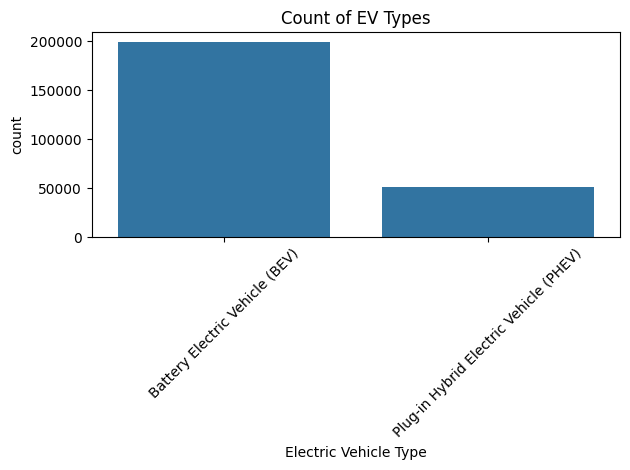

In [ ]:
# Now, it's time to explore the data and see what's up with it.
# NOTE: This code was obtained online.
sns.countplot(data=ev_df_clean, x='Electric Vehicle Type')
plt.title('Count of EV Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# There is a staggering difference between BEVs and PHEVs.

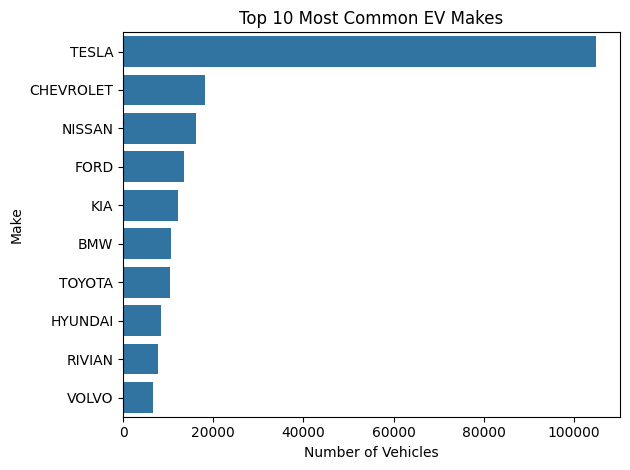

In [ ]:
# Now, let's see which brand is the most popular.
# NOTE: This code was obtained online.
top_makes = ev_df_clean['Make'].value_counts().head(10)

sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title('Top 10 Most Common EV Makes')
plt.xlabel('Number of Vehicles')
plt.tight_layout()
plt.show()
# Tesla has the most EV makes. Who could've predicted that?

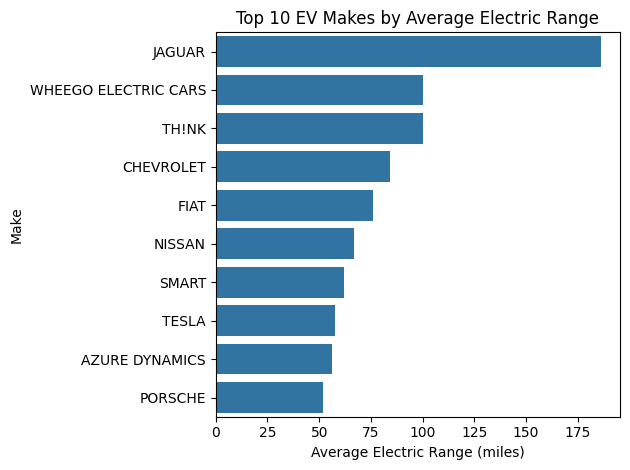

In [ ]:
# Now, let's see the top average electric range of brands.
# NOTE: This code was obtained online.
avg_range = ev_df_clean.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_range.values, y=avg_range.index)
plt.title('Top 10 EV Makes by Average Electric Range')
plt.xlabel('Average Electric Range (miles)')
plt.tight_layout()
plt.show()
# Jaguar has the most average electric range.

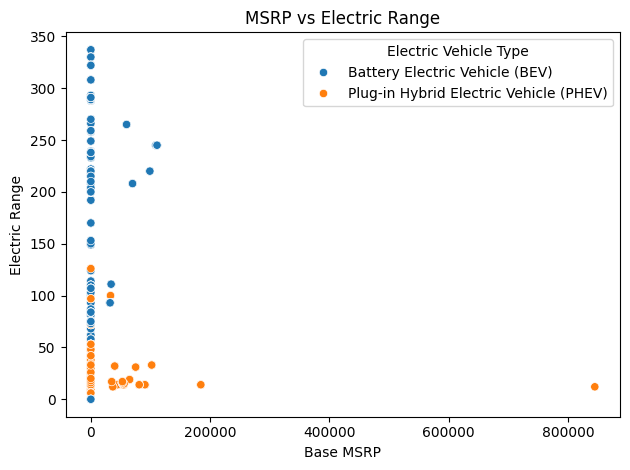

In [ ]:
# NOTE: This code was obtained online.
sns.scatterplot(data=ev_df_clean, x='Base MSRP', y='Electric Range', hue='Electric Vehicle Type')
plt.title('MSRP vs Electric Range')
plt.tight_layout()
plt.show()

# Hybrid cars have a much lower electric range.
# There is also a significant outlier regarding Base MSRP?

In [ ]:
# Creating a copy of the dataset.
area_type_df = ev_df_clean.copy()

In [ ]:
# This is where the classification of urban vs. rural began.
# Define county type assigner function.
def categorize_county(county):
    if county in urban_counties:
        return 'Urban'
    elif county in rural_counties:
        return 'Rural'
    else:
        return 'Unknown'  # Handle cases where a county might not be in either list, acts as a failsafe.

# Run the code.
area_type_df['Area Type'] = area_type_df['County'].apply(categorize_county)

# Display the updated DataFrame with the new column.
display(area_type_df.head())

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Area Type
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,PACIFICORP,5.307700e+10,Rural
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,PACIFICORP,5.307700e+10,Rural
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,PUGET SOUND ENERGY INC,5.306104e+10,Urban
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,PACIFICORP,5.307700e+10,Rural
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,PUGET SOUND ENERGY INC,5.303508e+10,Urban


In [ ]:
# Let's check all counties.
area_type_df['County'].unique()

array(['Yakima', 'Snohomish', 'Kitsap', 'King', 'Thurston', 'Island',
       'Whitman', 'Kittitas', 'Chelan', 'Spokane', 'Skagit', 'Grant',
       'Whatcom', 'Walla Walla', 'Stevens', 'Douglas', 'Lincoln', 'Clark',
       'Cowlitz', 'Clallam', 'Jefferson', 'Klickitat', 'Pierce',
       'San Juan', 'Mason', 'Benton', 'Grays Harbor', 'Lewis', 'Adams',
       'Pacific', 'Skamania', 'Franklin', 'Okanogan', 'Pend Oreille',
       'Asotin', 'Wahkiakum', 'Ferry', 'Columbia', 'Garfield'],
      dtype=object)

In [ ]:
# Urban counties are ones that are popular and have a high population.
urban_counties = [
    'King', 'Pierce', 'Snohomish',
    'Spokane', 'Clark', 'Thurston', 'Kitsap'
]

# Rural counties are ones that do not fit in the urban category.
rural_counties = [
    'Yakima', 'Whitman', 'Cowlitz', 'Jefferson', 'Island',
    'Klickitat', 'Whatcom', 'San Juan', 'Chelan', 'Lewis',
    'Kittitas', 'Skagit', 'Mason', 'Clallam', 'Grays Harbor',
    'Douglas', 'Franklin', 'Benton', 'Walla Walla', 'Wahkiakum',
    'Skamania', 'Grant', 'Pacific', 'Asotin', 'Lincoln',
    'Stevens', 'Okanogan', 'Adams', 'Pend Oreille', 'Ferry', 'Columbia',
    'Garfield'
]

# These were determined from a population density map of counties in the Washington state.

Total number of EVs by Area Type in Washington:
Area Type
Urban    216101
Rural     33954
Name: count, dtype: int64


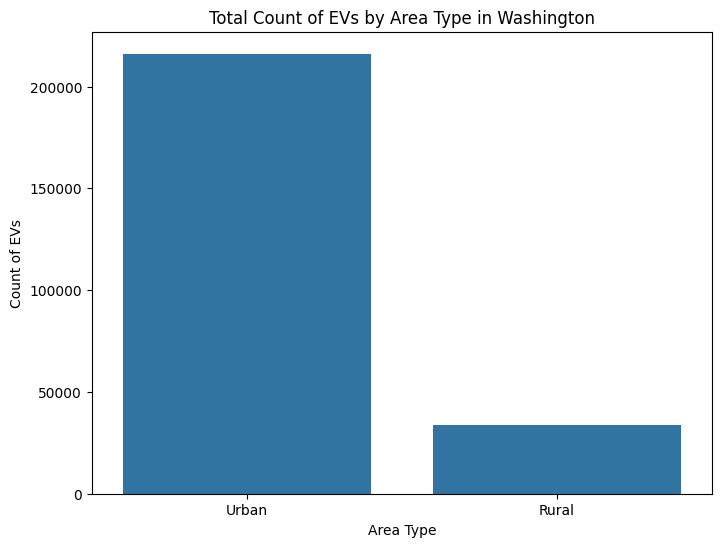

In [ ]:
# Group by 'Area Type' and count the number of EVs
ev_counts_by_area = area_type_df['Area Type'].value_counts()

# Print the counts
print("Total number of EVs by Area Type in Washington:")
print(ev_counts_by_area)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=ev_counts_by_area.index, y=ev_counts_by_area.values)
plt.title('Total Count of EVs by Area Type in Washington')
plt.xlabel('Area Type')
plt.ylabel('Count of EVs')
plt.show()

# **Filtering Useless Data Out**


In [ ]:
# For other uses, such as creating an ML model, we will need to remove all of the nonzero "Base MSRP" values.
msrp_df = ev_df_clean[ev_df_clean['Base MSRP'] > 0]

In [ ]:
# To check.
msrp_df.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract
73,5YJSA1DP4D,Yakima,Zillah,WA,98953.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,15.0,161861780,PACIFICORP,5.307700e+10
119,WMZYU7C56K,Yakima,Wapato,WA,98951.0,2019,MINI,COUNTRYMAN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12.0,36900.0,15.0,275675725,PACIFICORP,5.307700e+10
150,5YJSA1H17E,Thurston,Olympia,WA,98502.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,22.0,220028189,PUGET SOUND ENERGY INC,5.306701e+10
189,KNDJX3AE6G,Whitman,Palouse,WA,99161.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,9.0,234619542,AVISTA CORP,5.307500e+10
191,5YJSA1CN1D,Whitman,Pullman,WA,99163.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,9.0,131932041,AVISTA CORP,5.307500e+10
211,LYVBR0DK0J,Snohomish,Edmonds,WA,98020.0,2018,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17.0,52900.0,21.0,298238916,PUGET SOUND ENERGY INC,5.306105e+10
291,5YJSA1CP8D,Kitsap,Poulsbo,WA,98370.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,23.0,241115927,PUGET SOUND ENERGY INC,5.303594e+10
301,5YJSA1H25E,Kitsap,Port Orchard,WA,98366.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,26.0,104625104,PUGET SOUND ENERGY INC,5.303509e+10
328,KNDJP3AE4G,Thurston,Yelm,WA,98597.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,2.0,6037027,PUGET SOUND ENERGY INC,5.306701e+10
358,2C4RC1N72K,King,Redmond,WA,98052.0,2019,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,39995.0,45.0,297080570,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


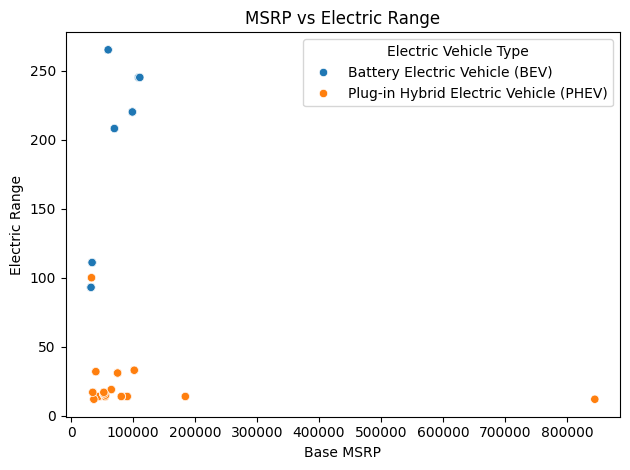

In [ ]:
# Let's check the chart with Base MSRP being higher than 0.
sns.scatterplot(data=msrp_df, x='Base MSRP', y='Electric Range', hue='Electric Vehicle Type')
plt.title('MSRP vs Electric Range')
plt.tight_layout()
plt.show()

# Hybrid cars have a much lower electric range.
# There is also a significant outlier regarding Base MSRP?

# **Making Area Types (Urban vs. Rural) + CAFV Eligibility**

In [ ]:
# We'll make a copy so that a backup is available in case something goes wrong.
int_df = msrp_df.copy()

In [ ]:
# Every string in the CAFV column will be replaced with 0 (not eligible) and 1 (eligible) for easier data analysis.
int_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = ev_df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].replace({
    'Clean Alternative Fuel Vehicle Eligible': 1,
    'Not eligible due to low battery range': 0,
    'Eligibility unknown as battery range has not been researched': 0 # These aren't eligible as well, but this is here just in case.
})

# To check.
display(int_df.head())

/tmp/ipython-input-3072571153.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  int_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = ev_df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].replace({


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract
73,5YJSA1DP4D,Yakima,Zillah,WA,98953.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),1,208.0,69900.0,15.0,161861780,PACIFICORP,5.307700e+10
119,WMZYU7C56K,Yakima,Wapato,WA,98951.0,2019,MINI,COUNTRYMAN,Plug-in Hybrid Electric Vehicle (PHEV),0,12.0,36900.0,15.0,275675725,PACIFICORP,5.307700e+10
150,5YJSA1H17E,Thurston,Olympia,WA,98502.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),1,208.0,69900.0,22.0,220028189,PUGET SOUND ENERGY INC,5.306701e+10
189,KNDJX3AE6G,Whitman,Palouse,WA,99161.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),1,93.0,31950.0,9.0,234619542,AVISTA CORP,5.307500e+10
191,5YJSA1CN1D,Whitman,Pullman,WA,99163.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),1,208.0,69900.0,9.0,131932041,AVISTA CORP,5.307500e+10


In [ ]:
# Define county type assigner function.
# This is done again because the previous code applied to only one DataFrame.
def categorize_county(county):
    if county in urban_counties:
        return 'Urban'
    elif county in rural_counties:
        return 'Rural'
    else:
        return 'Unknown'  # Handle cases where a county might not be in either list, acts as a failsafe.

# Run the code.
int_df['Area Type'] = int_df['County'].apply(categorize_county)

# Display the updated DataFrame with the new column
display(int_df.head())

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Area Type
73,5YJSA1DP4D,Yakima,Zillah,WA,98953.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),1,208.0,69900.0,15.0,161861780,PACIFICORP,5.307700e+10,Rural
119,WMZYU7C56K,Yakima,Wapato,WA,98951.0,2019,MINI,COUNTRYMAN,Plug-in Hybrid Electric Vehicle (PHEV),0,12.0,36900.0,15.0,275675725,PACIFICORP,5.307700e+10,Rural
150,5YJSA1H17E,Thurston,Olympia,WA,98502.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),1,208.0,69900.0,22.0,220028189,PUGET SOUND ENERGY INC,5.306701e+10,Urban
189,KNDJX3AE6G,Whitman,Palouse,WA,99161.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),1,93.0,31950.0,9.0,234619542,AVISTA CORP,5.307500e+10,Rural
191,5YJSA1CN1D,Whitman,Pullman,WA,99163.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),1,208.0,69900.0,9.0,131932041,AVISTA CORP,5.307500e+10,Rural


In [ ]:
# For easy charts, let's separate only the eligible ones.
eligible_only_df = int_df[int_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 1]

Text(0, 0.5, 'CAFV Eligibility Count')

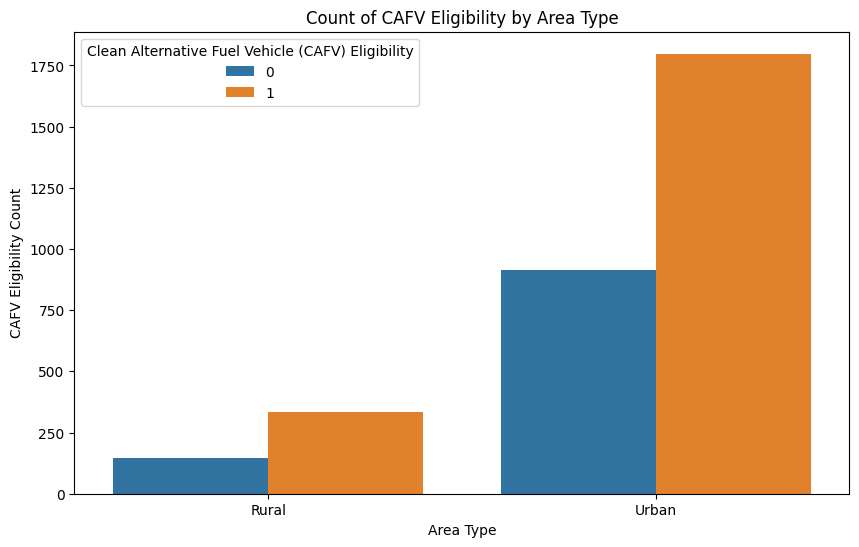

In [ ]:
# Chart INCLUDING ineligible vehicles.
plt.figure(figsize=(10, 6))
sns.countplot(data = int_df, x = 'Area Type', hue = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.title('Count of CAFV Eligibility by Area Type')
plt.xlabel('Area Type')
plt.ylabel('CAFV Eligibility Count')

Text(0, 0.5, 'CAFV Eligibility Count')

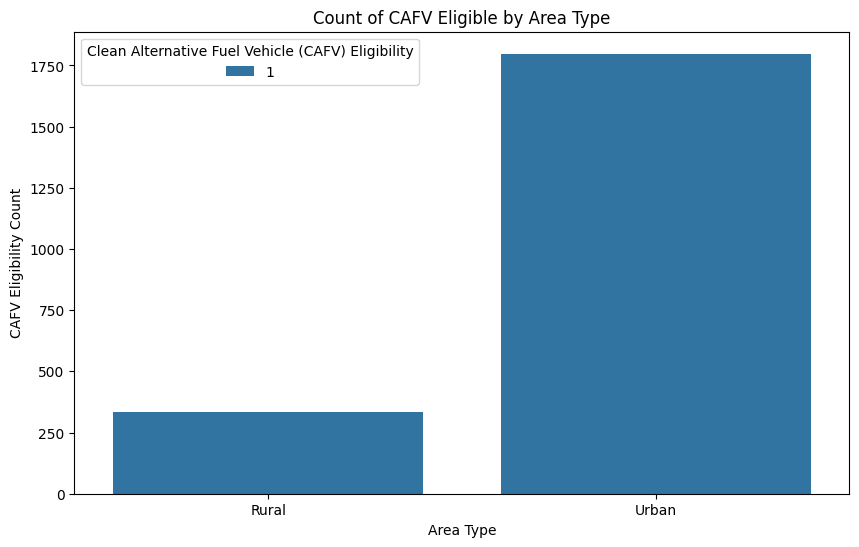

In [ ]:
# Chart EXCLUDING ineligible vehicles.
# We no longer need ineligible vehicles for now, since they're about 50% less than eligible vehicles in both area types.
plt.figure(figsize=(10, 6))
sns.countplot(data = eligible_only_df, x = 'Area Type', hue = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.title('Count of CAFV Eligible by Area Type')
plt.xlabel('Area Type')
plt.ylabel('CAFV Eligibility Count')

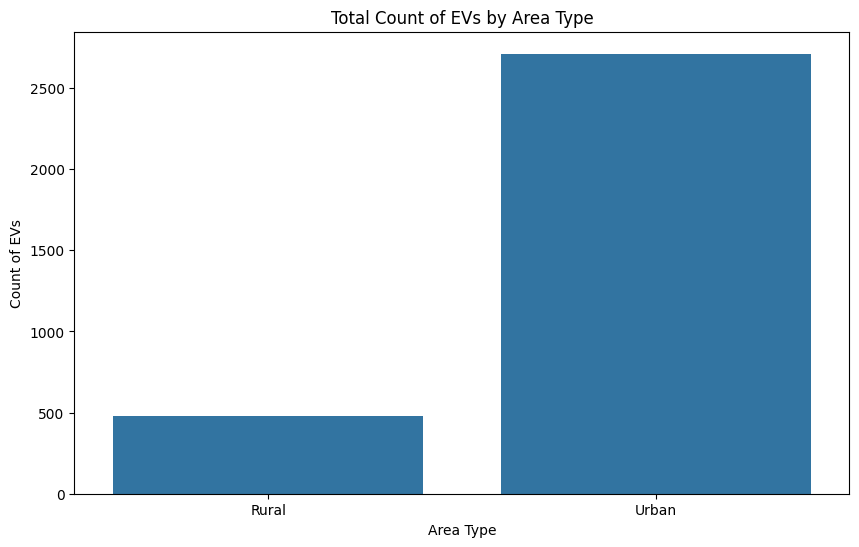

In [ ]:
# Chart showing total count of EVs in each area type.
plt.figure(figsize=(10, 6))
sns.countplot(data=int_df, x='Area Type')
plt.title('Total Count of EVs by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Count of EVs')
plt.show()

In [ ]:
# Perform a statistical test.
from scipy.stats import chi2_contingency

# Create a contingency table of Area Type and CAFV Eligibility
contingency_table = pd.crosstab(int_df['Area Type'], int_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared statistic: 1.7352331948738928
P-value: 0.18774394764913


Interpretation of the P-value:

The p-value (0.1877) is greater than the commonly used significance level of 0.05. This means we fail to reject the null hypothesis.

In the context of our research question, this suggests that there is no statistically significant difference in the proportion of Clean Alternative Fuel Vehicle (CAFV) eligible vehicles between urban and rural counties in Washington State, based on this dataset and analysis.

While we observed a difference in the total counts of EVs between urban and rural areas in the previous plot, this statistical test indicates that the proportion of eligible vehicles within those areas is not significantly different.

**So, we can infer that using CAFV for the dataset is not really insightful, so we'll remove that element and solely focus on the number of EVs in Urban vs. Rural counties.**

# KNN #1

In [ ]:
# Create a copy of the int_df DataFrame
class_df = int_df.copy()

# Define features (X) and target (y)
X = class_df[['Area Type', 'Electric Range', 'Base MSRP']]
y = class_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Convert 'Area Type' to numerical
area_map = {'Urban': 0, 'Rural': 1}
X['Area Type'] = X['Area Type'].map(area_map)

# Display the first few rows of X and y
display(X.head())
display(y.head())

/tmp/ipython-input-1421735746.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Area Type'] = X['Area Type'].map(area_map)


,Area Type,Electric Range,Base MSRP
73,1,208.0,69900.0
119,1,12.0,36900.0
150,0,208.0,69900.0
189,1,93.0,31950.0
191,1,208.0,69900.0


,Clean Alternative Fuel Vehicle (CAFV) Eligibility
73,1
119,0
150,1
189,1
191,1


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2552, 3)
Shape of X_test: (638, 3)
Shape of y_train: (2552,)
Shape of y_test: (638,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier object with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Use the trained KNN model to make predictions on the testing data
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the calculated metrics and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[222   0]
 [  0 416]]


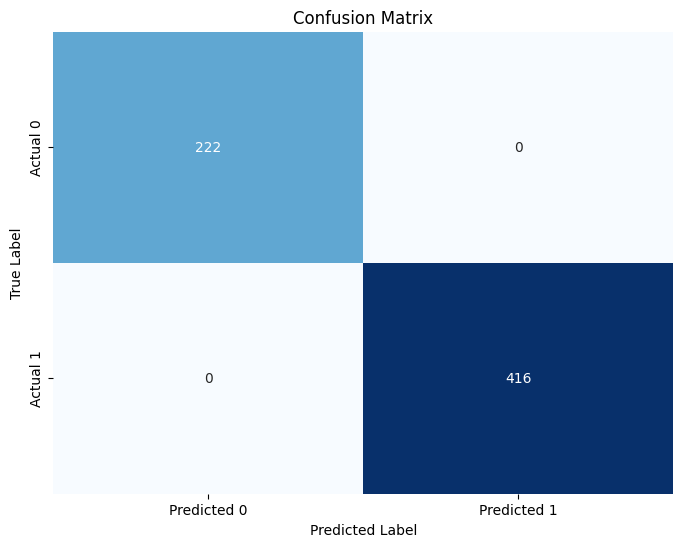

In [ ]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

After analyzing this, I figured that the model saw a pattern and showed such perfect results. Different variables will be used for the next one.

# Colorized Charts

Total number of EVs by Area Type:
Urban: 216,101
Rural: 33,954


/tmp/ipython-input-806423932.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_counts_by_area.index, y=ev_counts_by_area.values, palette=colors)


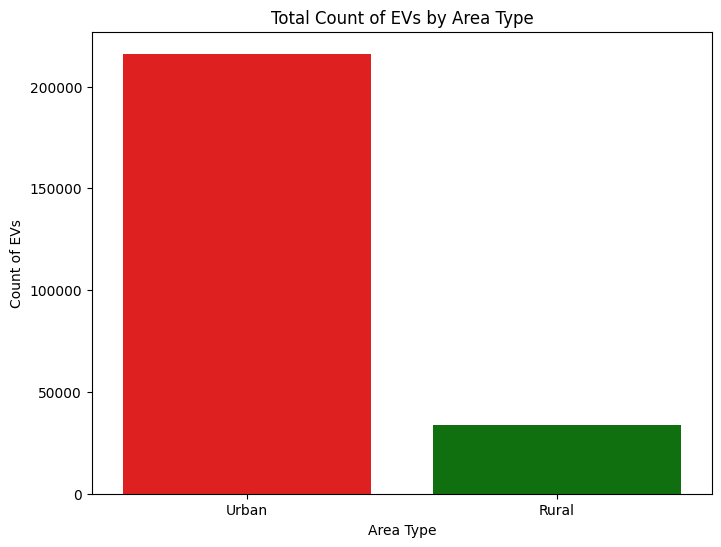

In [ ]:
# Group by 'Area Type' and count the number of EVs
ev_counts_by_area = area_type_df['Area Type'].value_counts()

# Print the counts with comma formatting
print("Total number of EVs by Area Type:")
for area_type, count in ev_counts_by_area.items():
    print(f"{area_type}: {count:,}")

# Create a bar plot
plt.figure(figsize=(8, 6))
colors = ['red' if area == 'Urban' else 'green' for area in ev_counts_by_area.index]
sns.barplot(x=ev_counts_by_area.index, y=ev_counts_by_area.values, palette=colors)
plt.title('Total Count of EVs by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Count of EVs')
plt.show()

Total number of EVs by Area Type:
Urban: 216,101
Rural: 33,954


/tmp/ipython-input-641363575.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_counts_by_area.index, y=ev_counts_by_area.values, palette=colors)


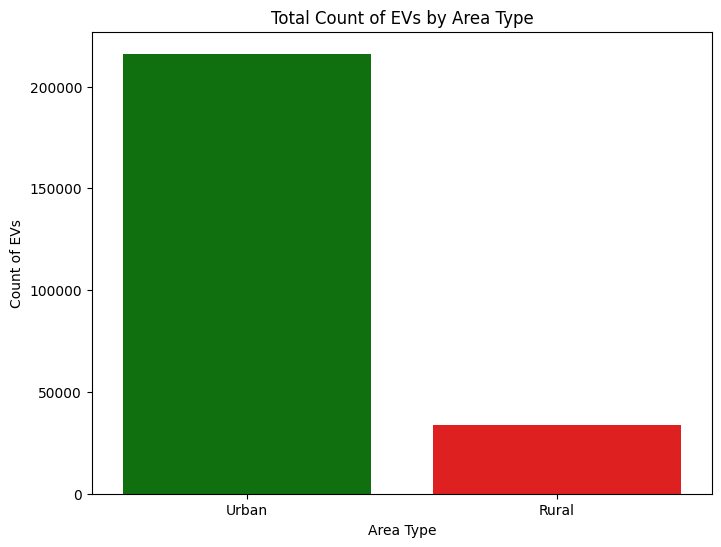

In [ ]:
# Group by 'Area Type' and count the number of EVs
ev_counts_by_area = area_type_df['Area Type'].value_counts()

# Print the counts with comma formatting
print("Total number of EVs by Area Type:")
for area_type, count in ev_counts_by_area.items():
    print(f"{area_type}: {count:,}")

# Create a bar plot
plt.figure(figsize=(8, 6))
colors = ['green' if area == 'Urban' else 'red' for area in ev_counts_by_area.index]
sns.barplot(x=ev_counts_by_area.index, y=ev_counts_by_area.values, palette=colors)
plt.title('Total Count of EVs by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Count of EVs')
plt.show()

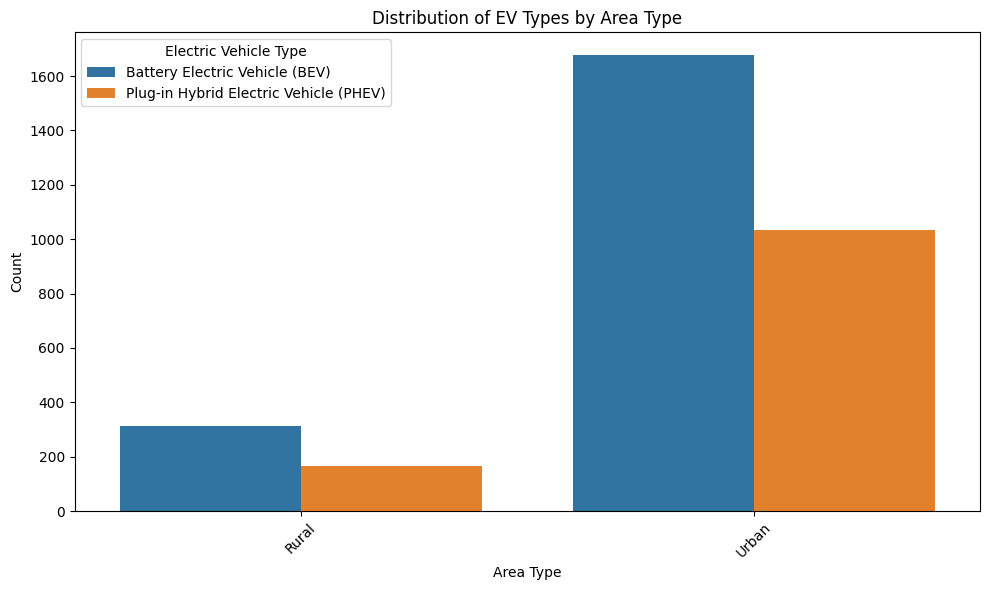


Proportion of EV Types by Area Type:
Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
Area Type                                               
Rural                                        0.651357   
Urban                                        0.618591   

Electric Vehicle Type  Plug-in Hybrid Electric Vehicle (PHEV)  
Area Type                                                      
Rural                                                0.348643  
Urban                                                0.381409  


In [ ]:
# Let's see if there's too much of a difference in BEVs vs. PHEVs in county area types.
plt.figure(figsize=(10, 6))
sns.countplot(data=int_df, x='Area Type', hue='Electric Vehicle Type')
plt.title('Distribution of EV Types by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the proportion of each 'Electric Vehicle Type' for both 'Urban' and 'Rural' area types
ev_type_proportions = int_df.groupby('Area Type')['Electric Vehicle Type'].value_counts(normalize=True).unstack()

# Print the calculated proportions
print("\nProportion of EV Types by Area Type:")
print(ev_type_proportions)

# KNN #2


In [ ]:
# Create a copy of the int_df DataFrame
class_df_area = int_df.copy()

# Define features (X) and target (y)
X = class_df_area[['Make', 'Model', 'Electric Range', 'Base MSRP']]
y = class_df_area['Area Type']

# Apply one-hot encoding to 'Make' and 'Model' columns
X = pd.get_dummies(X, columns=['Make', 'Model'], drop_first=True)

# Display the first few rows of the processed X and the target y
display(X.head())
display(y.head())

,Electric Range,Base MSRP,Make_CADILLAC,Make_CHRYSLER,Make_FISKER,Make_KIA,Make_MINI,Make_PORSCHE,Make_SUBARU,Make_TESLA,...,Model_CT6,Model_KARMA,Model_MODEL S,Model_PACIFICA,Model_PANAMERA,Model_ROADSTER,Model_SOUL,Model_WHEEGO,Model_XC60,Model_XC90
73,208.0,69900.0,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
119,12.0,36900.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
150,208.0,69900.0,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
189,93.0,31950.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
191,208.0,69900.0,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


,Area Type
73,Rural
119,Rural
150,Urban
189,Rural
191,Rural


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2552, 28)
Shape of X_test: (638, 28)
Shape of y_train: (2552,)
Shape of y_test: (638,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier object with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Use the trained KNN model to make predictions on the testing data
y_pred = knn.predict(X_test)

Accuracy: 0.8495297805642633
Precision: 0.8495297805642633
Recall: 1.0
F1-score: 0.9186440677966101
Confusion Matrix:
[[  0  96]
 [  0 542]]


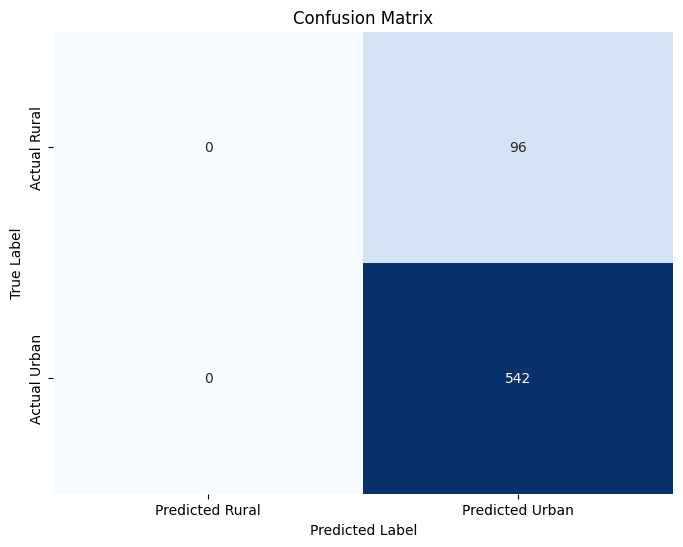

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='Urban')

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='Urban')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='Urban')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Rural', 'Urban'])

# Print the calculated metrics and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Rural', 'Predicted Urban'],
            yticklabels=['Actual Rural', 'Actual Urban'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The KNN model achieved an accuracy of approximately 84.95% in predicting the 'Area Type'.
*   The precision for the 'Urban' class was approximately 84.95%, while the recall for the 'Urban' class was 1.0 (100%).
*   The F1-score for the 'Urban' class was approximately 0.9186.
*   The confusion matrix shows that the model correctly predicted all 542 actual 'Urban' instances but misclassified all 96 actual 'Rural' instances as 'Urban'.

### Insights

*   The model is heavily biased towards the 'Urban' class, likely due to class imbalance in the dataset. This just shows how much the difference is in urban vs. rural counties.


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table of Area Type and EV counts
# We can use the value counts of 'Area Type' as the counts of EVs for each area type
contingency_table_ev_counts = pd.crosstab(int_df['Area Type'], columns='Count')

# Perform the Chi-squared test
chi2_ev_counts, p_ev_counts, dof_ev_counts, expected_ev_counts = chi2_contingency(contingency_table_ev_counts)

print(f"Chi-squared statistic for Area Type and EV Counts: {chi2_ev_counts}")
print(f"P-value for Area Type and EV Counts: {p_ev_counts}")

# Interpretation of the P-value:
alpha = 0.05
print(f"\nInterpretation (using alpha = {alpha}):")
if p_ev_counts < alpha:
    print("The p-value is less than the significance level. We reject the null hypothesis.")
    print("There is a statistically significant relationship between county type (urban/rural) and EV counts.")
else:
    print("The p-value is greater than the significance level. We fail to reject the null hypothesis.")
    print("There is no statistically significant relationship between county type (urban/rural) and EV counts.")
# Something went wrong in this code, but I don't know what it is.

Chi-squared statistic for Area Type and EV Counts: 0.0
P-value for Area Type and EV Counts: 1.0

Interpretation (using alpha = 0.05):
The p-value is greater than the significance level. We fail to reject the null hypothesis.
There is no statistically significant relationship between county type (urban/rural) and EV counts.
